##### Exercício de PRÉ PROCESSAMENTO DE DADOS - Revisar etapas e comandos de transformação de dados
##### 1) Leia o arquivo CSV exemplo em https://raw.githubusercontent.com/CaiqueCoelho/Preprocessing-Dataset-Template/master/fake_data_2.csv

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CaiqueCoelho/Preprocessing-Dataset-Template/master/fake_data_2.csv')

##### 2) Exiba o tipo de dado das colunas. Quais são categóricas ou de contagem? Quais são numéricas?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cargo    14 non-null     object 
 1   idade    14 non-null     int64  
 2   salario  12 non-null     float64
 3   bonus    12 non-null     float64
 4   sócio    14 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 688.0+ bytes


<font color="yellow">Cargo e sócio: CATEGÓRICAS; idade, salario, bonus: NUMERICAS, sendo idade INTEIRO64 e as demais FLOAT64</font>

##### 3) Com o método unique() verifique quais são as categorias de cargos no dataset

In [66]:
df['cargo'].unique()

array(['Diretor', 'Analista', 'Programador', 'Gerente', 'Fundador'],
      dtype=object)

##### 4) Quais os intervalos para as idades, salários e bônus neste dataset? usar describe()

In [67]:
df.describe()

,idade,salario,bonus
count,14.000000,12.000000,12.000000
mean,32.928571,16795.333333,7200.000000
std,12.499011,12355.108162,7610.996829
min,20.000000,2344.000000,1000.000000
25%,25.000000,6800.000000,2000.000000
50%,30.000000,14550.000000,5000.000000
75%,34.250000,25500.000000,10000.000000
max,65.000000,38000.000000,28000.000000


<font color="yellow">Idade: [20,65], Salario: [2344,38000], Bonus: [1000, 28000]</font>

##### 5) Verifique se há dados faltantes em alguma coluna

In [68]:
df.isnull().sum()

cargo      0
idade      0
salario    2
bonus      2
sócio      0
dtype: int64

<font color='yellow'>Apenas 2 registros com o salario faltando e 2 com o bonus faltando</font>

In [69]:
df

,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.0,10000.0,sim
1,Analista,22,8000.0,2000.0,não
2,Programador,30,NaN,1000.0,não
3,Gerente,24,15100.0,NaN,não
4,Gerente,30,35000.0,6000.0,sim
5,Programador,22,5300.0,2000.0,não
6,Analista,20,NaN,1200.0,não
7,Diretor,50,18000.0,8000.0,sim
8,Fundador,65,38000.0,28000.0,sim
9,Analista,32,7300.0,4000.0,não


##### 6) Preencha os dados faltantes com as médias aritméticas das respectivas colunas. Exemplo: dados faltantes na coluna idade, preencher com a média das idades. Para isto não use o método fillna. Use a classe SimpleInputer do sklearn.impute (ver documentação)

In [4]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # outras são median (mediana), most_frequent, constant (fill_value)

df[['salario', 'bonus']] = imputer.fit_transform(df[['salario', 'bonus']]) 

df



,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.000000,10000.0,sim
1,Analista,22,8000.000000,2000.0,não
2,Programador,30,16795.333333,1000.0,não
3,Gerente,24,15100.000000,7200.0,não
4,Gerente,30,35000.000000,6000.0,sim
5,Programador,22,5300.000000,2000.0,não
6,Analista,20,16795.333333,1200.0,não
7,Diretor,50,18000.000000,8000.0,sim
8,Fundador,65,38000.000000,28000.0,sim
9,Analista,32,7300.000000,4000.0,não


##### 7) Verique com o BOXPLOT se há outliers nas colunas numéricas. Para cada coluna com outliers corrigi-los com a técnica de intervalo interquartil (ver slide)

<Axes: >

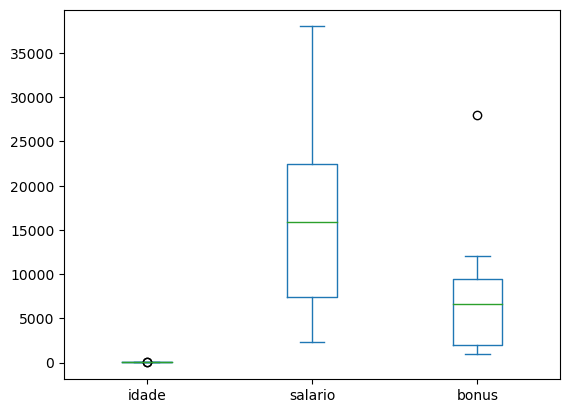

In [71]:
df.plot(kind = 'box') # não fica bom dada a diferença de escala, gerar separados

<Axes: >

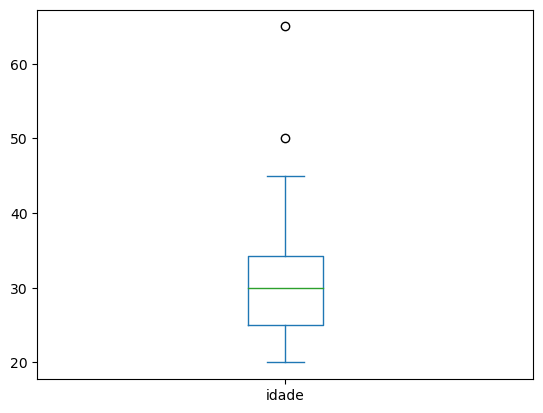

In [72]:
df['idade'].plot(kind = 'box')

<Axes: >

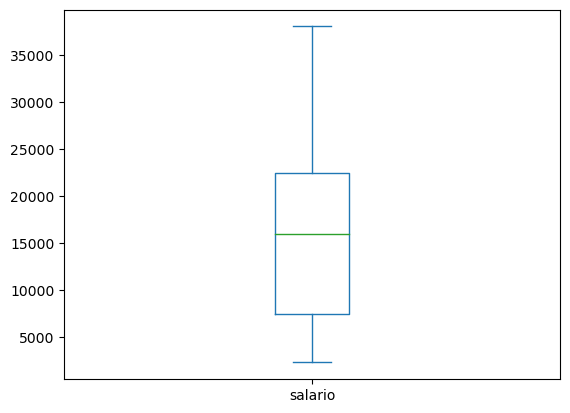

In [73]:
df['salario'].plot(kind = 'box')

<Axes: >

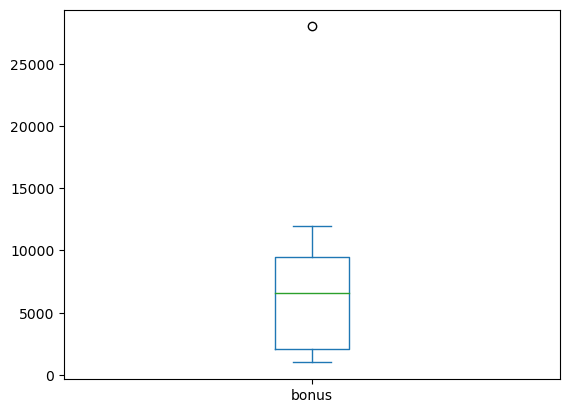

In [74]:
df['bonus'].plot(kind = 'box')

<font color='yellow'>Algoritmos não supervisionados de detecção de anomalias (por exemplo baseados em densidades) procuram exatamente os outliers durante o uso do modelo. Aqui nesta base podemos ver se nestas idades o salario e/ou bonus são maiores, pois pode ser da natureza do problema e não deve-se corrigir</font>

In [5]:
df[df['idade']>45]

,cargo,idade,salario,bonus,sócio
7,Diretor,50,18000.0,8000.0,sim
8,Fundador,65,38000.0,28000.0,sim


<font color='yellow'>Ou seja, está coerente, que diretores, fundadores, gerentes possuem os maiores salarios neste toy dataset. Contudo, vamos criar uma cópia para ver como seria a aplicação da correção IQR na coluna idade</font>

<Axes: >

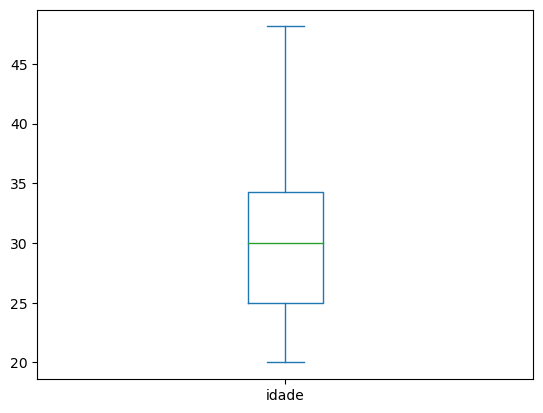

In [6]:
#trata outlier pela regra do 1.5*IQR (variação interquartil)

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

q1 = dfTeste['idade'].quantile(0.25)
q3 = dfTeste['idade'].quantile(0.75)
iqr = q3 - q1
lLim = q1 - 1.5 * iqr 
hLim = q3 + 1.5 * iqr
dfTeste.loc[dfTeste['idade'] < lLim, 'idade'] = lLim #substitui os valores abaixo do limite inferior pelo limite inferior
dfTeste.loc[dfTeste['idade'] > hLim, 'idade'] = hLim #substitui os valores acima do limite superior pelo limite superior

dfTeste['idade'].plot(kind = 'box')

##### 8) Crie um pipeline (classe Pipeline) com o imputer de preenchimento NA e com a padronização MinMaxScaler aplicados nas colunas numéricas

<font color='yellow'>Não queremos alterar a distribuição original dos dados. Apenas aplicar a reescala para ajustar os dados na faixa [0,1]</font>

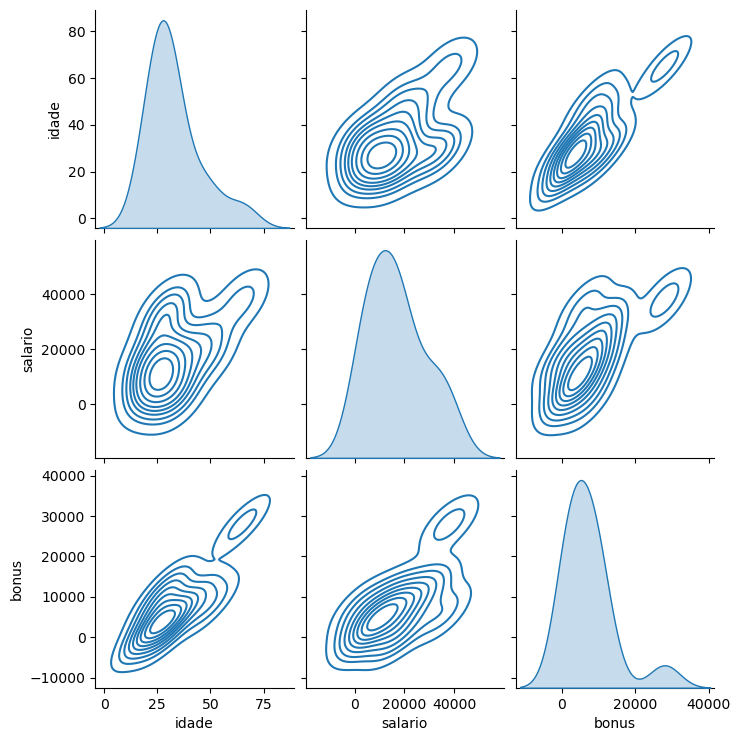

In [7]:
import seaborn as sb

sb.pairplot(df, kind='kde')

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipe_transform = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('min_max_scaler', MinMaxScaler())
])

X = pipe_transform.fit_transform(df.drop(columns=['cargo','sócio'])) #retorna array NumPy com colunas transformadas numéricas idade, salario, bonus

df_tr = pd.DataFrame(X, columns=['idade','salario','bonus'], index=df.index)

df_tr['cargo'] = df['cargo']
df_tr['socio'] = df['sócio']

df_tr

# Sem PipeLine seria
#df[['idade', 'salario', 'bonus']] = MinMaxScaler().fit_transform(df[['idade', 'salario', 'bonus']])

,idade,salario,bonus,cargo,socio
0,0.555556,0.607359,0.333333,Diretor,sim
1,0.044444,0.158627,0.037037,Analista,não
2,0.222222,0.405299,0.000000,Programador,não
3,0.088889,0.357752,0.229630,Gerente,não
4,0.222222,0.915863,0.185185,Gerente,sim
5,0.044444,0.082903,0.037037,Programador,não
6,0.000000,0.405299,0.007407,Analista,não
7,0.666667,0.439085,0.259259,Diretor,sim
8,1.000000,1.000000,1.000000,Fundador,sim
9,0.266667,0.138995,0.111111,Analista,não


##### 9) Aplique o OneHotEncoder à coluna categórica cargo e o LabelEncoder à coluna sócio, exibindo o dataset resultante

In [9]:
df['cargo'].unique()

array(['Diretor', 'Analista', 'Programador', 'Gerente', 'Fundador'],
      dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


le_encoder = LabelEncoder()
socio_coded = le_encoder.fit(df['sócio'])
df_tr['socio'] = le_encoder.transform(df['sócio'])
#outra opção dfCargo = pd.get_dummies(df['cargo'], prefix = 'cargo') e depois o join com o df dfCargo.join(df.iloc[:, 1:]) #junta o dfCargo com o df sem a coluna cargo (sendo a primeira)

oh_encoder = OneHotEncoder(sparse=False) #para não gerar matriz esparsa, usar sparse=False
oh_encoder.fit(df['cargo'].unique().reshape(-1, 1))
transformed = oh_encoder.transform(df['cargo'].to_numpy().reshape(-1, 1))
oh_cargo = pd.DataFrame(transformed, columns=oh_encoder.get_feature_names_out())
#concat with original data
df_tr = pd.concat([df_tr, oh_cargo], axis=1).drop(columns=['cargo'],axis=1)

df_tr

c:\Users\josen\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,idade,salario,bonus,socio,x0_Analista,x0_Diretor,x0_Fundador,x0_Gerente,x0_Programador
0,0.555556,0.607359,0.333333,1,0.0,1.0,0.0,0.0,0.0
1,0.044444,0.158627,0.037037,0,1.0,0.0,0.0,0.0,0.0
2,0.222222,0.405299,0.000000,0,0.0,0.0,0.0,0.0,1.0
3,0.088889,0.357752,0.229630,0,0.0,0.0,0.0,1.0,0.0
4,0.222222,0.915863,0.185185,1,0.0,0.0,0.0,1.0,0.0
5,0.044444,0.082903,0.037037,0,0.0,0.0,0.0,0.0,1.0
6,0.000000,0.405299,0.007407,0,1.0,0.0,0.0,0.0,0.0
7,0.666667,0.439085,0.259259,1,0.0,1.0,0.0,0.0,0.0
8,1.000000,1.000000,1.000000,1,0.0,0.0,1.0,0.0,0.0
9,0.266667,0.138995,0.111111,0,1.0,0.0,0.0,0.0,0.0


##### 10) Verifique com mapa de calor a correlação entre idade, salario e bonus

<Axes: >

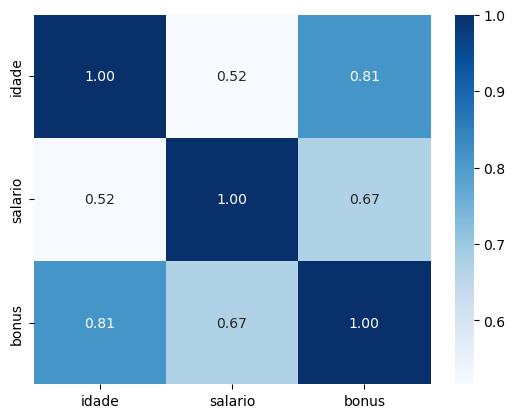

In [11]:
corr = df_tr[['idade', 'salario', 'bonus']].corr()

sb.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')


##### 11) Verifique o balanceamento entre sócio e não sócio. Em seguida utilize a classe NearMiss de imblearn.under_sampling (subamostragem) para reduzir a maior frequência para a menor frequência, igualando o número de cada classe. Após, apague do dataset a coluna sócio e inclua a nova coluna socio_balanceada no dataset

In [12]:
df_tr['socio'].value_counts()

0    8
1    6
Name: socio, dtype: int64

In [4]:
!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y

!pip install scikit-learn
!pip install imbalanced-learn

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1


ERROR: Could not find a version that satisfies the requirement scikit-learn (from versions: none)
ERROR: No matching distribution found for scikit-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.0.2 from https://files.pythonhosted.org/packages/52/2d/ad6928a578c78bb0e44e34a5a922818b14c56716b81d145924f1f291416f/scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 258.3/258.3 kB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9.3 MB 11.8 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/9.3 MB 9.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/9.3 MB 9.9 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.3 MB 9.4 MB/s eta 0:00:01
   --------- ---------------------

<font color='yellow'>Existem 8 sócios e 6 não sócios. Apenas de caráter didático vamos baixar os não sócios para equilibrar com os sócios (undersampling)</font>

In [18]:
from imblearn.under_sampling import NearMiss 

X, y = NearMiss().fit_resample(df_tr.drop(columns=['socio']), df_tr['socio'])

df_balanced = pd.DataFrame(X, columns=df_tr.columns.drop('socio'))
df_balanced['socio'] = y

print(df_balanced['socio'].value_counts())

print(df_balanced)

0    6
1    6
Name: socio, dtype: int64
       idade   salario     bonus  x0_Analista  x0_Diretor  x0_Fundador  \
0   0.222222  0.405299  0.000000          0.0         0.0          0.0   
1   0.333333  0.000000  0.229630          0.0         0.0          0.0   
2   0.088889  0.357752  0.229630          0.0         0.0          0.0   
3   0.177778  0.060467  0.044444          0.0         0.0          0.0   
4   0.044444  0.082903  0.037037          0.0         0.0          0.0   
5   0.266667  0.138995  0.111111          1.0         0.0          0.0   
6   0.555556  0.607359  0.333333          0.0         1.0          0.0   
7   0.222222  0.915863  0.185185          0.0         0.0          0.0   
8   0.666667  0.439085  0.259259          0.0         1.0          0.0   
9   1.000000  1.000000  1.000000          0.0         0.0          1.0   
10  0.177778  0.775634  0.407407          0.0         0.0          1.0   
11  0.222222  0.326902  0.333333          0.0         0.0          0.0  

##### 12) Salve o dataset processado em arquivo .csv

In [20]:
df_balanced.to_csv('datasets/fake_data_processed.csv', index=False)

<font color='yellow'>Recomendo ler sobre o algoritmo NEARMISS: NearMiss Algorithm – Undersampling
NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process. To prevent problem of

information loss

in most under-sampling techniques,

near-neighbor

methods are widely used.

The basic intuition about the working of near-neighbor methods is as follows:

Step 1: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, majority class is to be under-sampled.
Step 2: Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.
Step 3: If there are k instances in the minority class, the nearest method will result in k*n instances of the majority class.
For finding n closest instances in the majority class, there are several variations of applying NearMiss Algorithm :

NearMiss – Version 1 : It selects samples of the majority class for which average distances to the k closest instances of the minority class is smallest.
NearMiss – Version 2 : It selects samples of the majority class for which average distances to the k farthest instances of the minority class is smallest.
NearMiss – Version 3 : It works in 2 steps. Firstly, for each minority class instance, their M nearest-neighbors will be stored. Then finally, the majority class instances are selected for which the average distance to the N nearest-neighbors is the largest.
</font> E sobre o algoritmo de oversampling SMOTE